In [21]:
import re
import math
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score ,precision_score , recall_score , confusion_matrix , f1_score
from sklearn.model_selection import GridSearchCV
from ast import literal_eval
from gensim.models.keyedvectors import KeyedVectors
from sklearn.decomposition import PCA
pca = PCA(n_components=40)
from sklearn import datasets, metrics, model_selection
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [22]:
#data_train = pd.read_csv('./data/twitter_data_before_analysis.csv', error_bad_lines=False)
data_train = pd.read_csv('./data/twitter_data_before_analysis1.csv', error_bad_lines=False)
data_train = data_train.append(pd.read_csv('./data/ko_news_data_before_analysis.csv', error_bad_lines=False))
data_train = data_train.append(pd.read_csv('./data/en_news_data_before_analysis.csv', error_bad_lines=False))

In [23]:
data_train['period'] = pd.to_numeric(data_train['period'], errors='coerce')
data_train['category'] = pd.to_numeric(data_train['category'], errors='coerce')
data_train['label'] = pd.to_numeric(data_train['label'], errors='coerce')
data_train['Silhouette'] = pd.to_numeric(data_train['Silhouette'], errors='coerce')

In [24]:
print(len(data_train))

187533


In [25]:
X_train = data_train[data_train.columns.difference(['result'])]

In [26]:
#x_data_df = data_train[['period','raw_data','closer#','category','label','Silhouette']]
y_train = data_train['result']

In [27]:
X_train = X_train.drop('Unnamed: 0', axis=1)

In [28]:
eucl_data = pd.read_csv('../../analysis/cluster/causeanalysis/BTC/before_down_BTC0_euclidean.csv', error_bad_lines=False)
eucl_data['closer#'] = 2 # cosine 1 , euclidean 2

cosine_data = pd.read_csv('../../analysis/cluster/causeanalysis/BTC/before_down_BTC0_cosine.csv', error_bad_lines=False)
cosine_data['closer#'] = 1 # cosine 1 , euclidean 2

data_BTC0DB = eucl_data
data_BTC0DB.append(cosine_data)

data_BTC0DB['period'] = 201712 #  2017년 의 상반기 1 , 하반기 2 down 2, up 1

In [29]:
eucl_data = pd.read_csv('../../analysis/cluster/causeanalysis/BTC/before_up_BTC0_euclidean.csv', error_bad_lines=False)
eucl_data['closer#'] = 2 # cosine 1 , euclidean 2

cosine_data = pd.read_csv('../../analysis/cluster/causeanalysis/BTC/before_up_BTC0_cosine.csv', error_bad_lines=False)
cosine_data['closer#'] = 1 # cosine 1 , euclidean 2

data_BTC0UB = eucl_data
data_BTC0UB.append(cosine_data)

data_BTC0UB['period'] = 201711 # 2017년의 상반기 01 , 하반기 02

In [30]:
data_test = pd.concat([data_BTC0DB,data_BTC0UB],ignore_index=True)

In [31]:
#data_test = pd.read_csv('./data/(test)_twitter_data_before_analysis.csv', error_bad_lines=False)
#data_test = data_test.append(pd.read_csv('./data/(test)_ko_news_data_before_analysis.csv', error_bad_lines=False))
#data_test = data_test.append(pd.read_csv('./data/(test)_en_news_data_before_analysis.csv', error_bad_lines=False))

In [32]:
data_test['period'] = pd.to_numeric(data_test['period'], errors='coerce')
data_test['category'] = pd.to_numeric(data_test['category'], errors='coerce')
data_test['label'] = pd.to_numeric(data_test['label'], errors='coerce')
data_test['Silhouette'] = pd.to_numeric(data_test['Silhouette'], errors='coerce')

In [33]:
print(len(data_test))

header = []
for i in range(1,101) :
    header.append('C'+str(i))

13776


In [34]:
X_test = data_test[['period','raw_data','closer#','category','label','Silhouette']]

In [35]:
y_test = data_test['result']

In [36]:
X_test['raw_data'] = X_test['raw_data'].apply(lambda x: x[1:len(x)-1].split(','))

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
tempFrame = pd.DataFrame(columns = header )

In [38]:
for index,row in X_test.iterrows() :

    raw_data_list = [float(i.replace(" ","")) for i in row['raw_data']]
    
    
    tempSeries = pd.Series(raw_data_list , index = header)
    
    tempFrame = tempFrame.append(tempSeries , ignore_index=True)
    
    if( (index%1000)==0 ) :
        print(index)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000


In [39]:
tempFrame

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C91,C92,C93,C94,C95,C96,C97,C98,C99,C100
0,0.193276,-0.704265,-0.058637,-0.526841,-0.093432,0.640591,0.530594,-0.231643,0.710645,0.354861,...,0.241372,-0.396862,-0.257912,-0.317559,-1.047442,1.066586,-0.492452,0.110801,1.513927,0.483434
1,0.053015,-0.168041,-0.046956,-0.195397,-0.033421,0.189001,0.173464,-0.048425,0.236529,0.145954,...,0.062879,-0.130606,-0.054467,-0.102093,-0.245267,0.345119,-0.146398,-0.047513,0.443642,0.169772
2,0.187034,-0.385396,-0.092749,-0.584313,-0.192518,0.383262,0.536007,-0.128646,0.693914,0.571300,...,0.217527,-0.527368,-0.258570,-0.153019,-0.487128,0.952153,-0.561850,-0.430627,0.990200,0.525449
3,0.006207,-0.004175,0.002687,-0.011512,0.002024,0.011322,0.011873,-0.003935,0.008462,0.006518,...,0.004809,-0.005366,-0.007392,0.001200,-0.010893,0.012300,-0.005470,0.000625,0.017307,0.006009
4,0.007514,-0.026640,-0.010339,-0.032414,-0.008747,0.030333,0.029958,-0.013449,0.038326,0.024106,...,0.009362,-0.024542,-0.008683,-0.013471,-0.038619,0.063352,-0.025889,-0.009849,0.080098,0.028550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13771,0.011819,-0.090781,0.021610,0.040103,-0.024543,-0.026851,-0.007906,0.006463,-0.073261,-0.000929,...,0.100529,0.002045,-0.056985,-0.043318,-0.034539,0.032545,-0.029693,-0.026402,0.037843,0.069986
13772,0.004332,-0.056742,0.013022,0.018041,-0.012912,-0.014504,-0.005670,0.006605,-0.043979,0.000388,...,0.056798,0.005022,-0.027766,-0.024692,-0.023076,0.016661,-0.010269,-0.014223,0.025099,0.046698
13773,0.003509,-0.046340,0.015760,0.022382,-0.007993,-0.018834,-0.004605,0.000845,-0.040281,-0.002929,...,0.053876,0.000964,-0.026502,-0.022031,-0.025323,0.012025,-0.012628,-0.016763,0.022536,0.043496
13774,0.005026,-0.042094,0.009322,0.016109,-0.011723,-0.016293,-0.007277,0.008283,-0.035924,0.004226,...,0.047954,0.002791,-0.025721,-0.019040,-0.016665,0.017439,-0.015047,-0.017973,0.023332,0.038439


In [40]:
X_test = pd.concat([tempFrame,X_test],axis=1,ignore_index=False)

In [41]:
X_test = X_test.drop('raw_data', axis=1)

In [42]:
X_test

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C96,C97,C98,C99,C100,period,closer#,category,label,Silhouette
0,0.193276,-0.704265,-0.058637,-0.526841,-0.093432,0.640591,0.530594,-0.231643,0.710645,0.354861,...,1.066586,-0.492452,0.110801,1.513927,0.483434,201712,2,3,13.0,0.769844
1,0.053015,-0.168041,-0.046956,-0.195397,-0.033421,0.189001,0.173464,-0.048425,0.236529,0.145954,...,0.345119,-0.146398,-0.047513,0.443642,0.169772,201712,2,3,7.0,0.769844
2,0.187034,-0.385396,-0.092749,-0.584313,-0.192518,0.383262,0.536007,-0.128646,0.693914,0.571300,...,0.952153,-0.561850,-0.430627,0.990200,0.525449,201712,2,3,11.0,0.769844
3,0.006207,-0.004175,0.002687,-0.011512,0.002024,0.011322,0.011873,-0.003935,0.008462,0.006518,...,0.012300,-0.005470,0.000625,0.017307,0.006009,201712,2,3,5.0,0.769844
4,0.007514,-0.026640,-0.010339,-0.032414,-0.008747,0.030333,0.029958,-0.013449,0.038326,0.024106,...,0.063352,-0.025889,-0.009849,0.080098,0.028550,201712,2,3,5.0,0.769844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13771,0.011819,-0.090781,0.021610,0.040103,-0.024543,-0.026851,-0.007906,0.006463,-0.073261,-0.000929,...,0.032545,-0.029693,-0.026402,0.037843,0.069986,201711,2,3,5.0,0.712854
13772,0.004332,-0.056742,0.013022,0.018041,-0.012912,-0.014504,-0.005670,0.006605,-0.043979,0.000388,...,0.016661,-0.010269,-0.014223,0.025099,0.046698,201711,2,3,5.0,0.712854
13773,0.003509,-0.046340,0.015760,0.022382,-0.007993,-0.018834,-0.004605,0.000845,-0.040281,-0.002929,...,0.012025,-0.012628,-0.016763,0.022536,0.043496,201711,2,3,5.0,0.712854
13774,0.005026,-0.042094,0.009322,0.016109,-0.011723,-0.016293,-0.007277,0.008283,-0.035924,0.004226,...,0.017439,-0.015047,-0.017973,0.023332,0.038439,201711,2,3,5.0,0.712854


In [43]:
rf_clf = RandomForestClassifier(random_state = 11 ,n_jobs=-1) # random forest

In [44]:
rf_clf.fit(X_train, y_train)

y_score = rf_clf.predict_proba(X_test)



In [45]:
rf_pred = rf_clf.predict(X_test)  # random forest predict

In [46]:
print('Random Forest Accuracy :  ',accuracy_score(y_test,rf_pred))
print('Random Forest Precision :  ',precision_score(y_test,rf_pred,pos_label='positive',average='weighted'))
print('Random Forest Recall :  ',recall_score(y_test,rf_pred,pos_label='positive',average='weighted'))
print('Random Forest f1 :  ',f1_score(y_test,rf_pred,pos_label='positive',average='weighted'))

Random Forest Accuracy :   0.5246806039488966
Random Forest Precision :   0.27528973616017893
Random Forest Recall :   0.5246806039488966
Random Forest f1 :   0.3611113507277304


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
y_score

array([[0.59, 0.25, 0.16],
       [0.65, 0.26, 0.09],
       [0.55, 0.15, 0.3 ],
       ...,
       [0.5 , 0.25, 0.25],
       [0.51, 0.26, 0.23],
       [0.54, 0.23, 0.23]])

In [48]:
from sklearn.preprocessing import label_binarize

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

y_test_roc =label_binarize(y_test, classes=[1, 2, 3])

print(y_test)
print(y_test_roc)

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print('class : ',i,'==',roc_auc[i])



0        2
1        2
2        2
3        2
4        2
        ..
13771    1
13772    1
13773    1
13774    1
13775    1
Name: result, Length: 13776, dtype: int64
[[0 1 0]
 [0 1 0]
 [0 1 0]
 ...
 [1 0 0]
 [1 0 0]
 [1 0 0]]
class :  0 == 0.09919116302277946
class :  1 == 0.5601266848463807
class :  2 == nan


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:813: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


In [49]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_roc.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

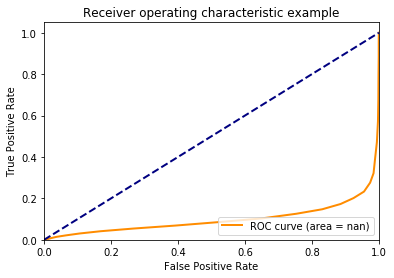

In [50]:
plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

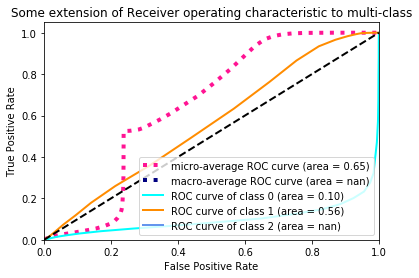

In [51]:
from scipy import interp
from itertools import cycle

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(3):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 3

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [52]:
dt_clf = DecisionTreeClassifier(random_state = 11)
dt_clf.fit(X_train,y_train)
dt_pred = dt_clf.predict(X_test)

In [53]:
print('Decision Tree Accuracy :  ',accuracy_score(y_test,dt_pred))
print('Decision Tree Precision :  ',precision_score(y_test,dt_pred,pos_label='positive',average='weighted'))
print('Decision Tree Recall :  ',recall_score(y_test,dt_pred,pos_label='positive',average='weighted'))
print('Decision Tree f1 :  ',f1_score(y_test,dt_pred,pos_label='positive',average='weighted'))

Decision Tree Accuracy :   0.5246806039488966
Decision Tree Precision :   0.27528973616017893
Decision Tree Recall :   0.5246806039488966
Decision Tree f1 :   0.3611113507277304


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
y_score = dt_clf.predict_proba(X_test)

In [55]:
fpr = dict()
tpr = dict()
roc_auc = dict()

In [56]:
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print('class : ',i,'==',roc_auc[i])

class :  0 == 0.5
class :  1 == 0.5
class :  2 == nan


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:813: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


In [57]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_roc.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

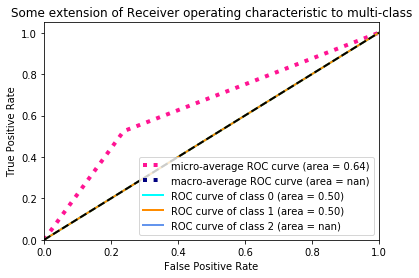

In [58]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(3):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 3

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [59]:
#gb_clf = GradientBoostingClassifier(random_state = 11) # random forest
lgbm_clf =  LGBMClassifier(random_state = 11)

In [60]:
#gb_clf.fit(X_train,y_train)
#gb_pred = gb_clf.predict(X_test)

lgbm_clf.fit(X_train,y_train)
lgbm_pred = lgbm_clf.predict(X_test)

In [61]:
#print('Gredient Boosting Accuracy :  ',accuracy_score(y_test,gb_pred))
#print('Gredient Boosting Precision :  ',precision_score(y_test,gb_pred,pos_label='positive',average='weighted'))
#print('Gredient Boosting Recall :  ',recall_score(y_test,gb_pred,pos_label='positive',average='weighted'))
#print('Gredient Boosting f1 :  ',f1_score(y_test,gb_pred,pos_label='positive',average='weighted'))
print('Light GBM Accuracy :  ',accuracy_score(y_test,lgbm_pred))
print('Light GBM Precision :  ',precision_score(y_test,lgbm_pred,pos_label='positive',average='weighted'))
print('Light GBM Recall :  ',recall_score(y_test,lgbm_pred,pos_label='positive',average='weighted'))
print('Light GBM f1 :  ',f1_score(y_test,lgbm_pred,pos_label='positive',average='weighted'))

Light GBM Accuracy :   0.5246806039488966
Light GBM Precision :   0.27528973616017893
Light GBM Recall :   0.5246806039488966
Light GBM f1 :   0.3611113507277304


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
y_score = lgbm_clf.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

In [63]:
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print('class : ',i,'==',roc_auc[i])

class :  0 == 0.11845723834446845
class :  1 == 0.8778278044826016
class :  2 == nan


In [64]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_roc.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

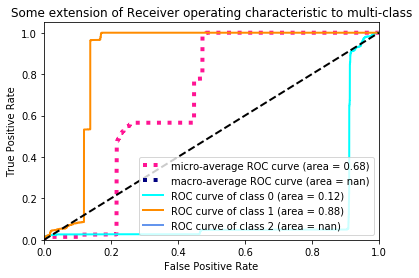

In [65]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(3):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 3

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [66]:
lr_clf = LogisticRegression(random_state = 11)

In [67]:
lr_clf.fit(X_train,y_train)
lr_pred = lr_clf.predict(X_test)

In [68]:
print('Logistic Regression Accuracy :  ',accuracy_score(y_test,lr_pred))
print('Logistic Regression  Precision :  ',precision_score(y_test,lr_pred,pos_label='positive',average='weighted'))
print('Logistic Regression  Recall :  ',recall_score(y_test,lr_pred,pos_label='positive',average='weighted'))
print('Logistic Regression  f1 :  ',f1_score(y_test,lr_pred,pos_label='positive',average='weighted'))

Logistic Regression Accuracy :   0.5246806039488966
Logistic Regression  Precision :   0.27528973616017893
Logistic Regression  Recall :   0.5246806039488966
Logistic Regression  f1 :   0.3611113507277304


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1270: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'weighted'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [69]:
y_score = lr_clf.predict_proba(X_test)

y_score = np.round(y_score,5)

fpr = dict()
tpr = dict()
roc_auc = dict()

In [70]:
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print('class : ',i,'==',roc_auc[i])

class :  0 == 0.5
class :  1 == 0.5
class :  2 == nan


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:813: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


In [71]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_roc.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

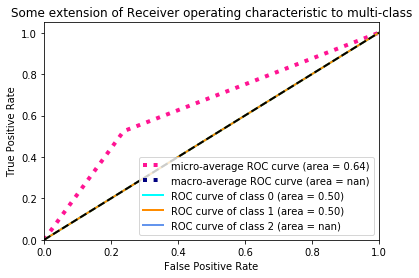

In [72]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(3):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 3

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [73]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [74]:
X_train

,C1,C10,C100,C11,C12,C13,C14,C15,C16,C17,...,C95,C96,C97,C98,C99,Silhouette,category,closer#,label,period
0,-0.001495,0.002059,-0.003641,0.002519,-0.000030,-0.000061,0.000266,-0.001268,-0.005870,0.004812,...,-0.001215,-0.005617,-0.000767,0.003659,-0.001297,0.126229,3.0,2,1.0,202011
1,-0.021860,0.025023,-0.030539,-0.053737,-0.034043,-0.106272,0.101318,0.046353,-0.032074,0.056494,...,-0.085919,-0.086635,-0.032728,0.003305,0.029844,0.126229,3.0,2,12.0,202011
2,-0.006153,0.000252,-0.000431,-0.007744,-0.001371,-0.012007,0.004584,-0.001146,-0.006225,0.003439,...,-0.002505,-0.002000,-0.006141,-0.000919,0.005992,0.126229,3.0,2,13.0,202011
3,-0.011715,0.010112,-0.014666,-0.018584,-0.010574,-0.035928,0.037478,0.020299,-0.011364,0.024920,...,-0.035902,-0.030800,-0.010657,0.002631,0.007532,0.126229,3.0,2,12.0,202011
4,-0.004312,0.010082,-0.009291,-0.017374,-0.011016,-0.033451,0.031159,0.015416,-0.016344,0.022197,...,-0.027211,-0.024827,-0.013575,-0.000735,0.013313,0.126229,3.0,2,12.0,202011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112261,0.002639,-0.007745,0.015926,-0.011952,-0.002111,-0.004357,-0.000599,-0.012847,-0.000155,-0.024394,...,0.005706,0.015451,0.006023,0.001769,0.004318,0.746625,1.0,2,5.0,201924
112262,-0.000535,-0.008106,0.016009,-0.012102,0.005943,-0.004983,-0.004764,-0.011634,0.001370,-0.025071,...,0.004042,0.014530,-0.000182,0.002224,-0.003322,0.746625,1.0,2,5.0,201924
112263,0.004187,0.000229,0.007715,-0.005602,0.004873,-0.005352,-0.002468,-0.003581,0.005097,-0.003656,...,-0.003402,0.004426,-0.001443,0.001934,-0.000474,0.746625,1.0,2,5.0,201924
112264,-0.002951,-0.006462,0.012489,-0.003590,-0.002220,-0.002896,-0.001683,-0.016026,0.004791,-0.019189,...,0.003951,0.013484,0.002950,0.001749,0.001292,0.746625,1.0,2,5.0,201924


In [75]:
model = Sequential()
model.add(Dense(120, input_dim=105, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [76]:
# compile the keras model
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [77]:
from keras.utils import to_categorical

y_train = y_train.apply(lambda x : x-1)

In [78]:
y_cate_train = to_categorical(y_train , num_classes=3)
#y_cate_train = y_train

In [79]:
y_cate_train

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [80]:
#y_cate_train = list(y_train)

In [81]:
#X_train

In [82]:
model.fit(X_train,y_cate_train, epochs=30, batch_size=500)

Epoch 1/30
187533/187533 [==============================] - 1s 7us/step - loss: 119.9721 - accuracy: 0.3948
Epoch 2/30
187533/187533 [==============================] - 1s 6us/step - loss: 42.2421 - accuracy: 0.3953
Epoch 3/30
187533/187533 [==============================] - 1s 6us/step - loss: 14.5910 - accuracy: 0.3974
Epoch 4/30
187533/187533 [==============================] - 1s 6us/step - loss: 12.4242 - accuracy: 0.3941
Epoch 5/30
187533/187533 [==============================] - 1s 6us/step - loss: 2.9464 - accuracy: 0.4175
Epoch 6/30
187533/187533 [==============================] - 1s 6us/step - loss: 7.0044 - accuracy: 0.4037
Epoch 7/30
187533/187533 [==============================] - 1s 6us/step - loss: 1.2875 - accuracy: 0.4282
Epoch 8/30
187533/187533 [==============================] - 1s 6us/step - loss: 1.0484 - accuracy: 0.4347
Epoch 9/30
187533/187533 [==============================] - 1s 6us/step - loss: 1.0654 - accuracy: 0.4386
Epoch 10/30
187533/187533 [==============

In [83]:
X_test

,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,...,C96,C97,C98,C99,C100,period,closer#,category,label,Silhouette
0,0.193276,-0.704265,-0.058637,-0.526841,-0.093432,0.640591,0.530594,-0.231643,0.710645,0.354861,...,1.066586,-0.492452,0.110801,1.513927,0.483434,201712,2,3,13.0,0.769844
1,0.053015,-0.168041,-0.046956,-0.195397,-0.033421,0.189001,0.173464,-0.048425,0.236529,0.145954,...,0.345119,-0.146398,-0.047513,0.443642,0.169772,201712,2,3,7.0,0.769844
2,0.187034,-0.385396,-0.092749,-0.584313,-0.192518,0.383262,0.536007,-0.128646,0.693914,0.571300,...,0.952153,-0.561850,-0.430627,0.990200,0.525449,201712,2,3,11.0,0.769844
3,0.006207,-0.004175,0.002687,-0.011512,0.002024,0.011322,0.011873,-0.003935,0.008462,0.006518,...,0.012300,-0.005470,0.000625,0.017307,0.006009,201712,2,3,5.0,0.769844
4,0.007514,-0.026640,-0.010339,-0.032414,-0.008747,0.030333,0.029958,-0.013449,0.038326,0.024106,...,0.063352,-0.025889,-0.009849,0.080098,0.028550,201712,2,3,5.0,0.769844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13771,0.011819,-0.090781,0.021610,0.040103,-0.024543,-0.026851,-0.007906,0.006463,-0.073261,-0.000929,...,0.032545,-0.029693,-0.026402,0.037843,0.069986,201711,2,3,5.0,0.712854
13772,0.004332,-0.056742,0.013022,0.018041,-0.012912,-0.014504,-0.005670,0.006605,-0.043979,0.000388,...,0.016661,-0.010269,-0.014223,0.025099,0.046698,201711,2,3,5.0,0.712854
13773,0.003509,-0.046340,0.015760,0.022382,-0.007993,-0.018834,-0.004605,0.000845,-0.040281,-0.002929,...,0.012025,-0.012628,-0.016763,0.022536,0.043496,201711,2,3,5.0,0.712854
13774,0.005026,-0.042094,0.009322,0.016109,-0.011723,-0.016293,-0.007277,0.008283,-0.035924,0.004226,...,0.017439,-0.015047,-0.017973,0.023332,0.038439,201711,2,3,5.0,0.712854


In [84]:
y_test = y_test.apply(lambda x : x-1)

In [85]:
y_cate_test = to_categorical(y_test , num_classes=3)

In [86]:
y_cate_test

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [87]:
score = model.evaluate(X_test, y_cate_test, batch_size=500)

13776/13776 [==============================] - 0s 4us/step


In [88]:
#score = model.evaluate(X_test, y_cate_test, batch_size=500)

In [89]:
score

[3742.9815086869826, 0.47531938552856445]

In [90]:
yhat_probs = model.predict(X_test ,batch_size=500 )

yhat_classes = model.predict_classes(X_test ,batch_size=500 )

# reduce to 1d array
#yhat_probs = yhat_probs[:, 0]
#yhat_classes = yhat_classes[:, 0]

In [91]:
yhat_probs

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [92]:
yhat_classes

array([1, 1, 1, ..., 1, 1, 1])

In [93]:
y_cate_test

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [94]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes )
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes , average='micro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes , average='micro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes,average='micro')
print('F1 score: %f' % f1)

Accuracy: 0.475319
Precision: 0.475319
Recall: 0.475319
F1 score: 0.475319


In [95]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

y_test_roc =label_binarize(y_test, classes=[0, 1, 2])

print(y_test)
print(y_test_roc)

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], yhat_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print('class : ',i,'==',roc_auc[i])

0        1
1        1
2        1
3        1
4        1
        ..
13771    0
13772    0
13773    0
13774    0
13775    0
Name: result, Length: 13776, dtype: int64
[[0 1 0]
 [0 1 0]
 [0 1 0]
 ...
 [1 0 0]
 [1 0 0]
 [1 0 0]]
class :  0 == 0.5
class :  1 == 0.5
class :  2 == nan


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:813: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


In [96]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_roc.ravel(), yhat_probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

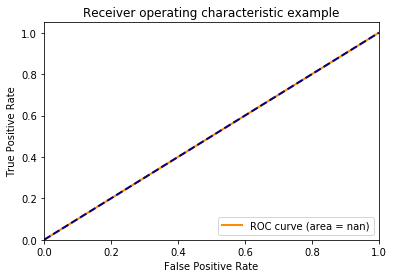

In [97]:
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


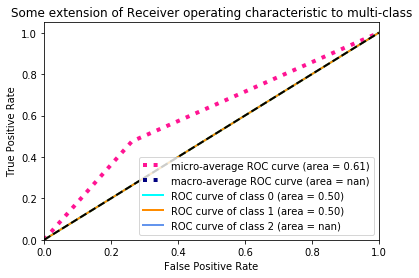

In [98]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(3):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 3

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [99]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, yhat_classes )
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, yhat_classes , average='micro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, yhat_classes , average='micro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, yhat_classes,average='micro')
print('F1 score: %f' % f1)

Accuracy: 0.475319
Precision: 0.475319
Recall: 0.475319
F1 score: 0.475319


In [100]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

y_test_roc =label_binarize(y_test, classes=[0, 1, 2])

print(y_test)
print(y_test_roc)

for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_roc[:, i], yhat_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    print('class : ',i,'==',roc_auc[i])

0        1
1        1
2        1
3        1
4        1
        ..
13771    0
13772    0
13773    0
13774    0
13775    0
Name: result, Length: 13776, dtype: int64
[[0 1 0]
 [0 1 0]
 [0 1 0]
 ...
 [1 0 0]
 [1 0 0]
 [1 0 0]]
class :  0 == 0.5
class :  1 == 0.5
class :  2 == nan


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:813: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


In [101]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_roc.ravel(), yhat_probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

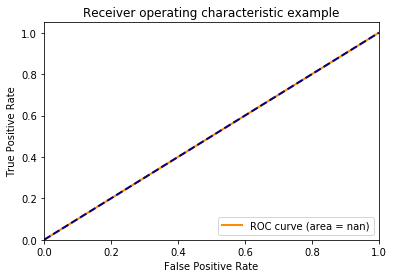

In [102]:
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


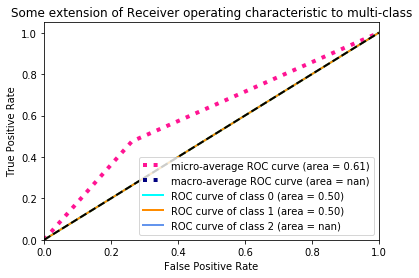

In [103]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(3):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= 3

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(3), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()